In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyexcel_ods import get_data
import warnings

warnings.filterwarnings('ignore')

In [2]:
# # getting ods data ... 
# file = 'prc-pfa-mar2013-onwards-tables-191023.ods'
# ods_file = get_data(file)

In [3]:
# !pip install openpyxl

#### Data Importation

In [202]:
# loading Sheet in table
# sheet list 
sheet_list = ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
pd_list = []
for sheet in sheet_list: 
    pd_list.append(pd.read_excel('dataset.xlsx', sheet_name=sheet))
    print(f'{sheet} File read complete')

# print(f'{len(pd_list)}')

2012-13 File read complete
2013-14 File read complete
2014-15 File read complete
2015-16 File read complete
2016-17 File read complete
2017-18 File read complete
2018-19 File read complete
2019-20 File read complete
2020-21 File read complete
2021-22 File read complete
2022-23 File read complete
2023-24 File read complete


In [203]:
len(pd_list)

12

In [7]:
# loop through... the pd---list.. 
for df in pd_list:
    print(df.shape)

(27116, 8)
(20780, 8)
(21132, 8)
(21308, 8)
(21308, 8)
(23068, 8)
(23068, 8)
(23426, 8)
(23772, 8)
(23772, 8)
(23772, 8)


#### Data Exploration

In [204]:
# combining the entire dataset......
police_data = pd.concat(pd_list, axis=0)
police_data.head(3)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1


In [205]:
police_data.shape

(258905, 8)

In [9]:
police_data.tail(3)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
23769,2022/23,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,78312
23770,2022/23,4,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,88141
23771,2022/23,4,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,113476


In [10]:
police_data.sample(3)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
17901,2015/16,4,Gwent,Threat or possession with intent to commit cri...,Miscellaneous crimes against society,Miscellaneous crimes against society,59,67
9068,2019/20,2,Merseyside,Attempted murder,Violence against the person,Violence with injury,2,10
17699,2017/18,4,Cambridgeshire,Assault without injury,Violence against the person,Violence without injury,105A,1905


In [11]:
# Data exploration

In [207]:
row, col = police_data.shape
print(f'Row Count : {row}           Column Count : {col}')

Row Count : 258905           Column Count : 8


In [208]:
# with the infor show that no miss entry in any columns
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258905 entries, 0 to 6382
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       258905 non-null  object
 1   Financial Quarter    258905 non-null  int64 
 2   Force Name           258905 non-null  object
 3   Offence Description  258905 non-null  object
 4   Offence Group        258905 non-null  object
 5   Offence Subgroup     258905 non-null  object
 6   Offence Code         258905 non-null  object
 7   Number of Offences   258905 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [209]:
police_data.columns

Index(['Financial Year', 'Financial Quarter', 'Force Name',
       'Offence Description', 'Offence Group', 'Offence Subgroup',
       'Offence Code', 'Number of Offences'],
      dtype='object')

In [210]:
# showing each unique items or entries in each columns
for col in police_data.columns: 
    unique_entries = police_data[col].unique()
    print(f'\n=============== {col}  VALUE COUNT : {len(unique_entries)} ================')
    
    print(unique_entries)


=============== Financial Year  VALUE COUNT : 12 ================
['2012/13' '2013/14' '2014/15' '2015/16' '2016/17' '2017/18' '2018/19'
 '2019/20' '2020/21' '2021/22' '2022/23' '2023/24']

=============== Financial Quarter  VALUE COUNT : 4 ================
[1 2 3 4]

=============== Force Name  VALUE COUNT : 49 ================
['Action Fraud' 'Avon and Somerset' 'Bedfordshire'
 'British Transport Police' 'Cambridgeshire' 'Cheshire' 'CIFAS'
 'Cleveland' 'Cumbria' 'Derbyshire' 'Devon and Cornwall' 'Dorset' 'Durham'
 'Dyfed-Powys' 'Essex' 'Financial Fraud Action UK' 'Gloucestershire'
 'Greater Manchester' 'Gwent' 'Hampshire' 'Hertfordshire' 'Humberside'
 'Kent' 'Lancashire' 'Leicestershire' 'Lincolnshire' 'London, City of'
 'Merseyside' 'Metropolitan Police' 'Norfolk' 'North Wales'
 'North Yorkshire' 'Northamptonshire' 'Northumbria' 'Nottinghamshire'
 'South Wales' 'South Yorkshire' 'Staffordshire' 'Suffolk' 'Surrey'
 'Sussex' 'Thames Valley' 'Warwickshire' 'West Mercia' 'West Midlands

In [211]:
police_data['Number of Offences'].unique()[:400]

array([20323,     0,     1,     3,     5,    45,    25,   184,  2064,
          83,  1573,   140,   205,   182,     2,     8,  1655,   924,
         560,   818,  1721,    30,    16,    20,    22,     4,   120,
         417,    15,   206,   283,     7,   160,     6,   286,    10,
         849,    73,    11,    17,    12,   197,  2997,    34,    65,
           9,  1325,   200,    37,    53,  1074,    36,   165,    98,
         263,    27,   108,  2629,    61,    69,    32,   368,  1857,
         340,   756,   499,    39,   213,    57,   836,   525,    42,
          55,   100,   508,   524,   186,   365,   742,    14,    21,
         170,    38,    79,   303,    74,   821,    19,    33,   281,
          49,   173,    13,    26,   187,   783,    28,   150,   724,
         163,   175,   486,   862,   123,    54,    35,   117,    24,
        1097,  2361,    40,   635,   142,    -1,  1127,   268,   138,
         106,   457,   104,  2046,  1289,    29,   207,    71,   752,
         654,    78,

In [212]:
police_data.describe()

,Financial Quarter,Number of Offences
count,258905.000000,258905.000000
mean,2.463031,229.901837
std,1.128399,1724.363276
min,1.000000,-268.000000
25%,1.000000,0.000000
50%,2.000000,9.000000
75%,3.000000,83.000000
max,4.000000,132693.000000


#### Data Cleaning and Preprocessing

In [213]:
police_data[police_data['Number of Offences'] < 0]

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
407,2012/13,1,British Transport Police,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-1
715,2012/13,1,Cheshire,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-3
6835,2012/13,2,Avon and Somerset,Fraud by company director (outcomes only),Fraud offences,Fraud offences to 2012/13,51,-1
6865,2012/13,2,Avon and Somerset,Perjury,Miscellaneous crimes against society,Miscellaneous crimes against society,67,-1
6878,2012/13,2,Avon and Somerset,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-15
...,...,...,...,...,...,...,...,...
20355,2018/19,4,"London, City of",Endangering life,Violence against the person,Violence with injury,5E,-1
20377,2018/19,4,"London, City of",Other drug offences,Drug offences,Possession of drugs,92C,-1
20395,2018/19,4,"London, City of",Profiting from or concealing knowledge of the ...,Miscellaneous crimes against society,Miscellaneous crimes against society,38,-2
20415,2018/19,4,"London, City of",Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,-1


In [214]:
police_data['Number of Offences'] = police_data['Number of Offences'].astype(str)
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258905 entries, 0 to 6382
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       258905 non-null  object
 1   Financial Quarter    258905 non-null  int64 
 2   Force Name           258905 non-null  object
 3   Offence Description  258905 non-null  object
 4   Offence Group        258905 non-null  object
 5   Offence Subgroup     258905 non-null  object
 6   Offence Code         258905 non-null  object
 7   Number of Offences   258905 non-null  object
dtypes: int64(1), object(7)
memory usage: 17.8+ MB


In [215]:
# new_val = []
# for index in range(police_data.shape[0]):
#     val = police_data['Number of Offences'].iloc[index]
#     if '-' in val: 
#         new_val.append(val.replace('-', ''))
#     else: 
#         new_val.append(val)

# police_data['Number of Offences'] = new_val

In [216]:
police_data['Number of Offences'] = police_data['Number of Offences'].astype('int64')
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258905 entries, 0 to 6382
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       258905 non-null  object
 1   Financial Quarter    258905 non-null  int64 
 2   Force Name           258905 non-null  object
 3   Offence Description  258905 non-null  object
 4   Offence Group        258905 non-null  object
 5   Offence Subgroup     258905 non-null  object
 6   Offence Code         258905 non-null  object
 7   Number of Offences   258905 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [217]:
# ls = police_data['Number of Offences'].iloc[407]
# ls

In [218]:
police_data.to_csv('offence_data.csv')
print('data save successfully....')

data save successfully....


#### Data Visualization

In [219]:
colors = ['r', 'b', 'g', 'y', 'brown', 'orange']

In [220]:
police_data[['Offence Group','Number of Offences']].groupby('Offence Group').sum().sort_values(by='Number of Offences', ascending=False)

,Number of Offences
Offence Group,
Theft offences,20054575
Violence against the person,15518807
Fraud offences,8277914
Criminal damage and arson,6040678
Public order offences,4029186
Drug offences,1956510
Sexual offences,1502423
Miscellaneous crimes against society,964455
Robbery,758696


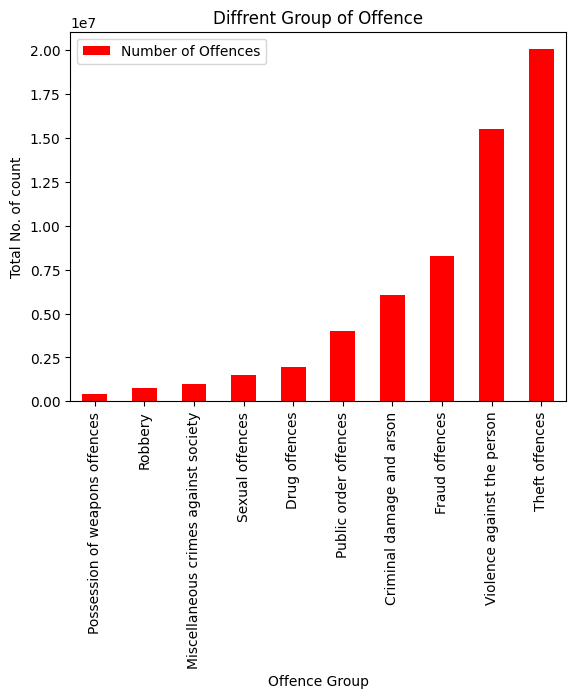

In [221]:
police_data[['Offence Group','Number of Offences']].groupby('Offence Group').sum().sort_values(by='Number of Offences').plot(kind='bar', color=['r', 'b', 'g', 'y'])
plt.title('Diffrent Group of Offence')
plt.xlabel('Offence Group')
plt.ylabel('Total No. of count')
plt.show()

<Axes: ylabel='Offence Description'>

<Figure size 4000x1900 with 0 Axes>

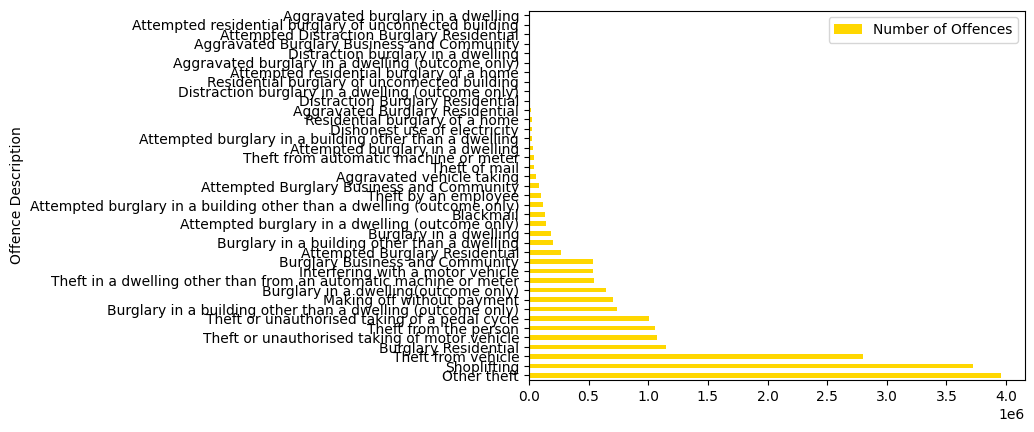

In [222]:
plt.figure(figsize=(40,19))
df = police_data[police_data['Offence Group'] == 'Theft offences']
df = df[['Offence Description', 'Number of Offences']]
df = df.groupby('Offence Description').sum()
df.sort_values(by='Number of Offences', ascending=False)[:-10].plot(kind='barh', color='gold')

In [223]:
# police_data

<Axes: ylabel='Offence Description'>

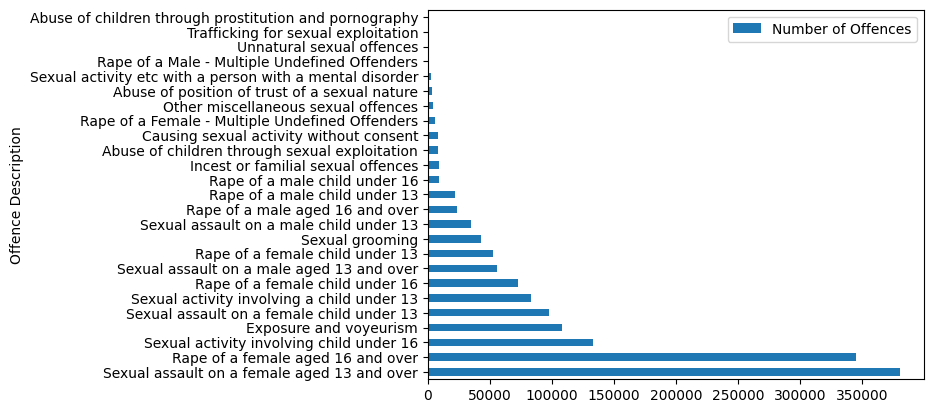

In [224]:
df = police_data[police_data['Offence Group'] == 'Sexual offences']
df = df[['Offence Description', 'Number of Offences']]
df = df.groupby('Offence Description').sum()
df.sort_values(by='Number of Offences', ascending=False).plot(kind='barh')

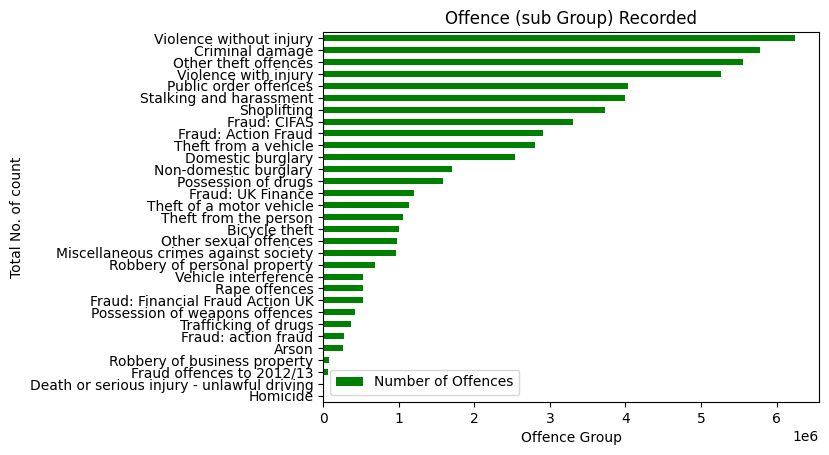

In [225]:
police_data[['Offence Subgroup','Number of Offences']].groupby('Offence Subgroup').sum().sort_values(by='Number of Offences').plot(kind='barh', color=['g', 'y'])
plt.title('Offence (sub Group) Recorded')
plt.xlabel('Offence Group')
plt.ylabel('Total No. of count')
plt.show()

In [226]:
# police_data['Offence Subgroup'].value_counts().plot(kind='bar', color=['r', 'b', 'g', 'y'])
# plt.title('Diffrent Offence Subgroup')
# plt.xlabel('Offence Sub Group')
# plt.ylabel('No. of count')
# plt.show()

In [227]:
# plt.figure(figsize=(5,10))
# color=['r', 'b', 'g', 'y', 'b', 'pink', 'black', 'orange']
# police_data['Offence Description'].value_counts()[:50].plot(kind='barh', color=color)

In [228]:
# plt.figure(figsize=(9,9))
# police_data[['Financial Year','Number of Offences']].groupby('Financial Year').sum().plot(color='red')
# plt.title('Offence Time Accross Time')
# plt.ylabel('Crime Rate In (Millions)')
# plt.xlabel('Years')
# plt.grid()
# plt.show()

In [229]:
# df = police_data[['Financial Year','Number of Offences']].groupby('Financial Year').sum().sort_values(by='Number of Offences', ascending=True)
# # year , offence_count = df['Financial Year'], df['Number of Offences']
# y, off = df.index, df['Number of Offences']
# plt.plot(y, off, color='red')
# plt.xticks(rotation=40)
# plt.title('Offence Time Accross Time')
# plt.ylabel('Crime Rate In (Millions)')
# plt.xlabel('Years')
# plt.grid()
# plt.show()


In [230]:
offence_type = police_data['Offence Group'].unique()

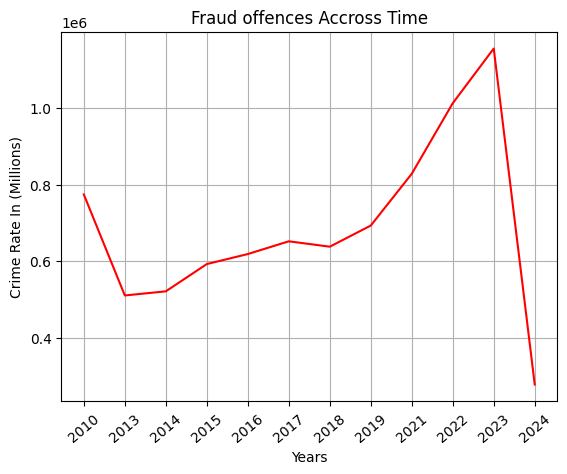

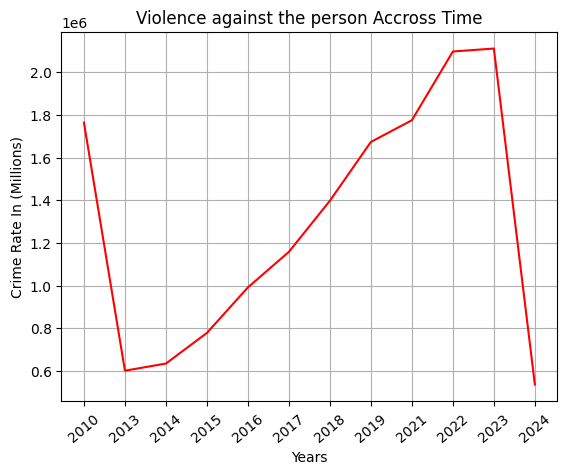

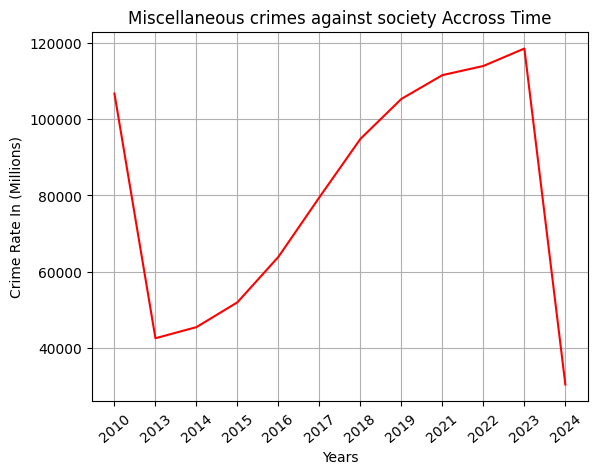

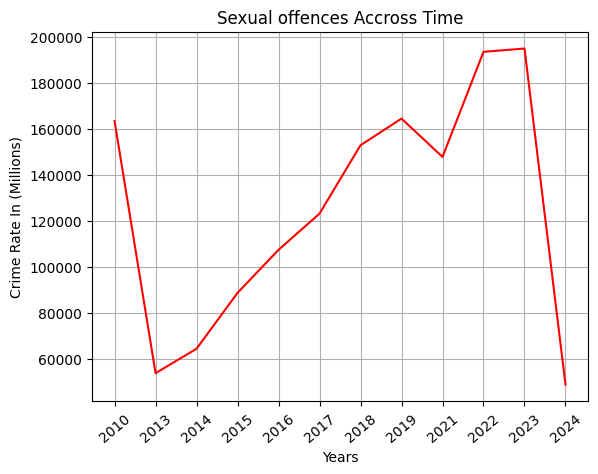

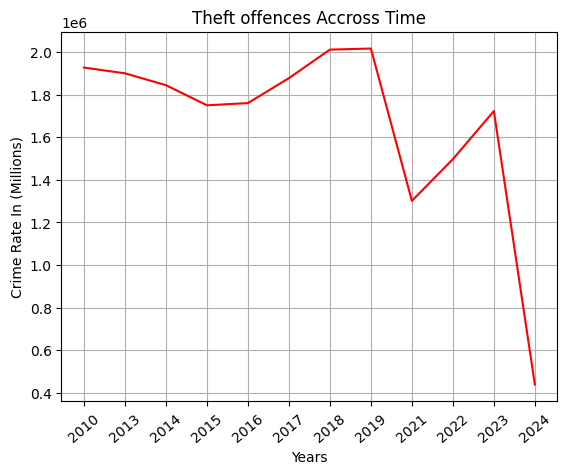

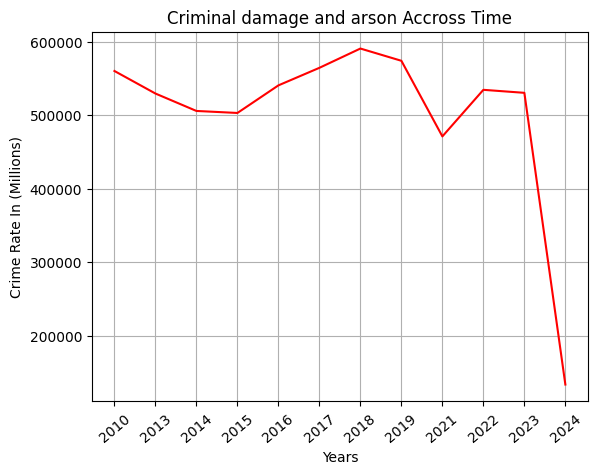

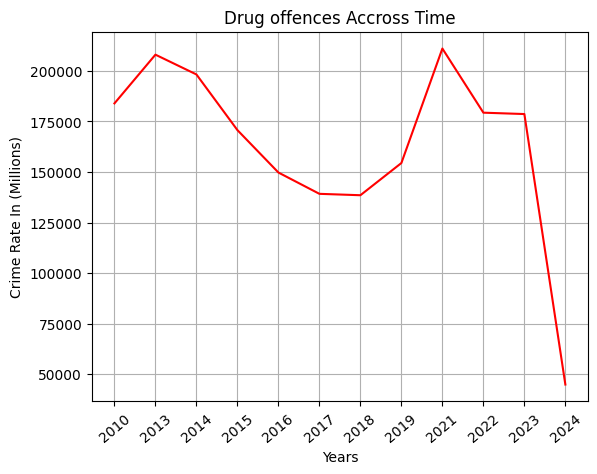

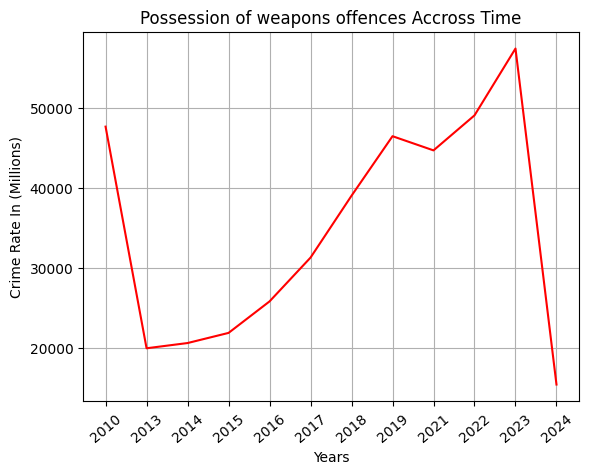

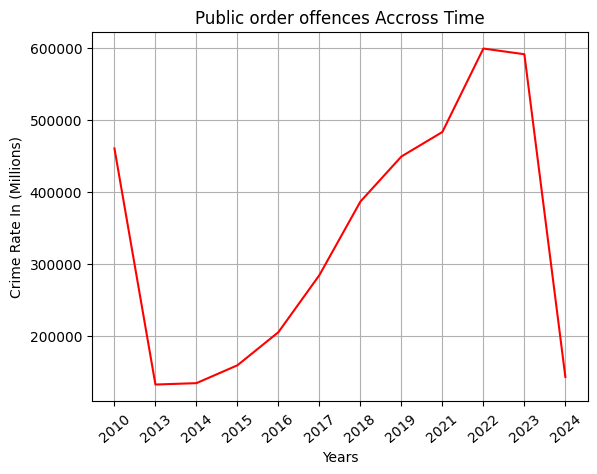

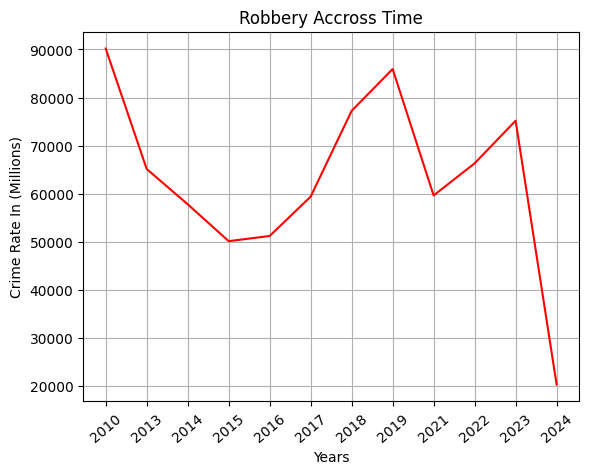

In [258]:

for offence in offence_type: 
    df = police_data[police_data['Offence Group'] == offence]
    df = df[['Financial Year', 'Offence Description', 'Number of Offences']]
    df = df.groupby('Financial Year').sum().sort_values(by='Financial Year', ascending=True)
    y, off = df.index, df['Number of Offences']
    plt.plot(y, off, color='red')
    plt.xticks(rotation=40)
    plt.title(f'{offence} Accross Time')
    plt.ylabel('Crime Rate In (Millions)')
    plt.xlabel('Years')
    plt.grid()
    plt.show()

In [259]:
df = police_data[['Financial Quarter', 'Number of Offences', 'Offence Group']]
df

,Financial Quarter,Number of Offences,Offence Group
0,1,20323,Fraud offences
1,1,0,Violence against the person
2,1,1,Miscellaneous crimes against society
3,1,0,Sexual offences
4,1,3,Sexual offences
...,...,...,...
6378,1,0,Public order offences
6379,1,5,Miscellaneous crimes against society
6380,1,79986,Fraud offences
6381,1,81062,Fraud offences


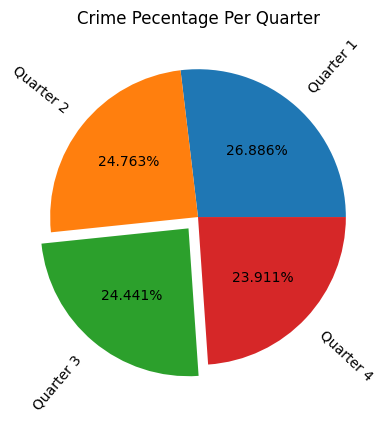

In [260]:
df = police_data[['Financial Quarter', 'Number of Offences', 'Offence Group']]
val = df.groupby('Financial Quarter')['Number of Offences'].sum().values
plt.pie(val, labels=['Quarter 1', 'Quarter 2','Quarter 3','Quarter 4'], autopct='%1.3f%%', explode=[0,0,0.1,0], rotatelabels=True)
plt.title('Crime Pecentage Per Quarter')
plt.show()

# df.groupby('Financial Quarter')['Number of Offences'].mean().plot(kind='bar')
# df.groupby('Financial Quarter')['Number of Offences'].median().plot(kind='bar')

In [261]:
df = police_data[['Number of Offences', 'Force Name']]
df

,Number of Offences,Force Name
0,20323,Action Fraud
1,0,Avon and Somerset
2,1,Avon and Somerset
3,0,Avon and Somerset
4,3,Avon and Somerset
...,...,...
6378,0,Wiltshire
6379,5,Wiltshire
6380,79986,Action Fraud
6381,81062,CIFAS


<Figure size 4000x1900 with 0 Axes>

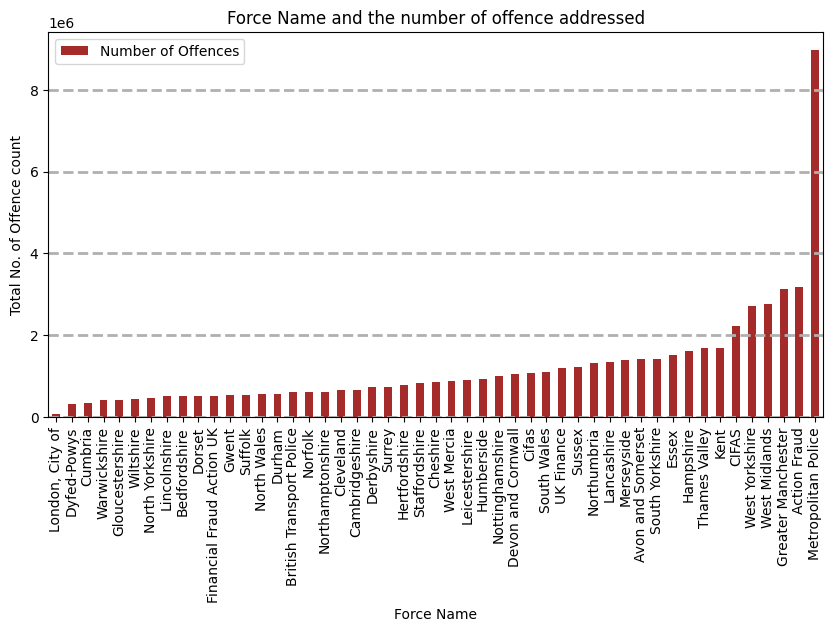

In [262]:
plt.figure(figsize=(40,19))
df = police_data[['Number of Offences', 'Force Name']].groupby('Force Name').sum().sort_values(by='Number of Offences').plot(kind='bar', figsize=(10,5), color=['brown', 'y'])
plt.title('Force Name and the number of offence addressed')
plt.xlabel('Force Name')
plt.ylabel('Total No. of Offence count')
plt.grid(axis='y', linestyle='--', lw='2')
plt.show()


# Data Transformation

In [263]:
# police_data['Financial Year'] = police_data['Financial Year'].replace(to_replace='\w/[13|14|15|16|17|18|19|20|21|22]',value='', regex=True)

In [231]:
data = police_data

In [264]:
data['Financial Year'] = data['Financial Year'].replace(to_replace='\w/[13|14|15|16|17|18|19|20|21|22]',value='', regex=True)
data.head(5)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2013,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2013,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2013,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2013,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,0
4,2013,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3


In [265]:
data[['Financial Year', 'Financial Quarter', 'Number of Offences']][data['Number of Offences'].values < 0].head()

,Financial Year,Financial Quarter,Number of Offences


In [266]:
data['Number of Offences'] = data['Number of Offences'].astype(str).replace(r'^-\d',0, regex=True)

In [267]:
data['Number of Offences'] = data['Number of Offences'].astype('int32')

In [268]:
data[['Financial Year', 'Financial Quarter', 'Number of Offences']][data['Number of Offences'].values < 0].head()

,Financial Year,Financial Quarter,Number of Offences


In [269]:
grouped_df = data.groupby(['Financial Year', 'Financial Quarter']).agg({'Number of Offences': 'sum'}).reset_index()
grouped_df

,Financial Year,Financial Quarter,Number of Offences
0,2010,1,1533600
1,2010,2,1565857
2,2010,3,1515797
3,2010,4,1463734
4,2013,1,1030157
5,2013,2,1045355
6,2013,3,1023242
7,2013,4,966109
8,2014,1,1007690
9,2014,2,1026565


In [270]:
grouped_df['quarter_year'] = grouped_df['Financial Quarter'].values.astype('str') + np.array('/').astype('object') + grouped_df['Financial Year'].values

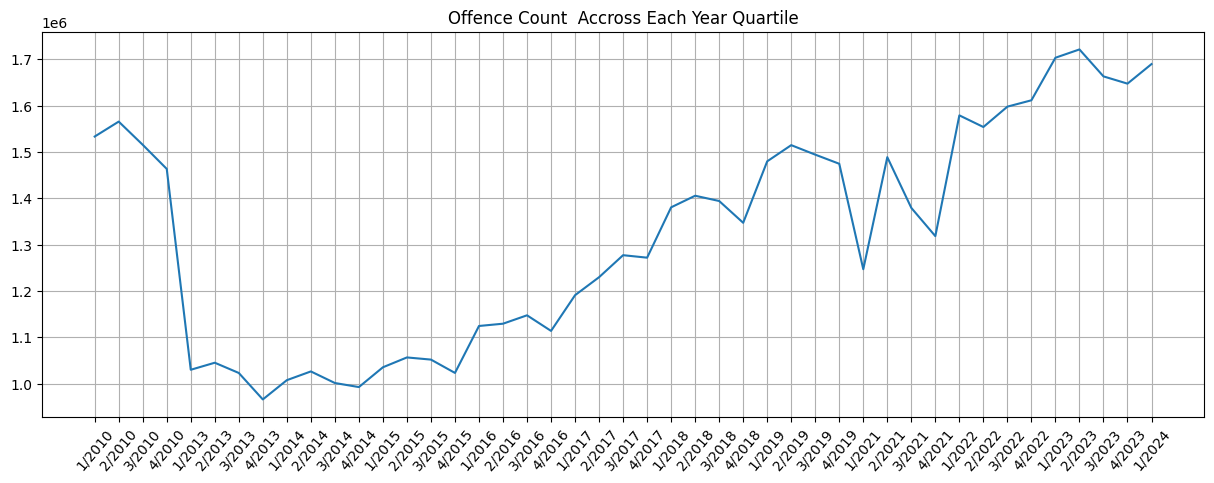

In [271]:
plt.figure(figsize=(15,5))
plt.plot(grouped_df['quarter_year'], grouped_df['Number of Offences'])
plt.xticks( rotation=50)
plt.title('Offence Count  Accross Each Year Quartile')
plt.grid()
plt.show()

## Dickey-Fuller test

In [272]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Dickey-Fuller test
def perform_adfuller_test(time_series):
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis. The series is stationary.")
    else:
        print("Fail to reject the null hypothesis. The series is not stationary.")


time_series = grouped_df['Number of Offences'].values
perform_adfuller_test(time_series)

ADF Statistic: -0.9193305373514828
p-value: 0.7815399607096891
Critical Values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}
Fail to reject the null hypothesis. The series is not stationary.


In [273]:
grouped_df['Financial Year'] = grouped_df['Financial Year'].astype('datetime64[ns]')

### data spliting

In [274]:
from sklearn import model_selection

y = grouped_df['Number of Offences']
x = grouped_df['Financial Year']
X_train, X_test, y_train, y_test  = model_selection.train_test_split(x,y, test_size=0.3, shuffle=False)

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## ARIMA model 

Mean Squared Error: 52929039764.59966


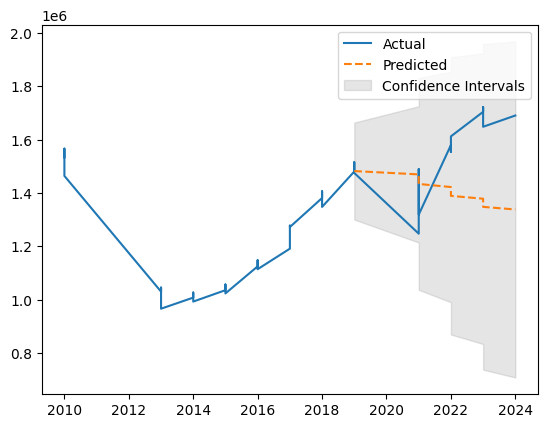

In [254]:
# Fit ARIMA model
order = (1, 1, 1)  
model = ARIMA(y_train, order=order)
fit_model = model.fit()

# Forecast future values
forecast_steps = len(y_test)
forecast = fit_model.get_forecast(steps=forecast_steps)

# Get predicted values and confidence intervals
y_pred = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.plot(x, y, label='Actual')
plt.plot(X_test, y_pred, label='Predicted', linestyle='dashed')
plt.fill_between(X_test, confidence_intervals['lower Number of Offences'], confidence_intervals['upper Number of Offences'], color='gray', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.show()

In [255]:
confidence_intervals.keys()

Index(['lower Number of Offences', 'upper Number of Offences'], dtype='object')

In [183]:
years = [2013, 2014, 2015]

# Generate daily timestamps for each year
daily_timestamps = []

for year in years:
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    timestamps = pd.date_range(start=start_date, end=end_date, freq='D')
    daily_timestamps.extend(timestamps)

# Convert the list of timestamps to a DataFrame
df = pd.DataFrame({'timestamp': daily_timestamps})

# Display the DataFrame
print(df)

      timestamp
0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
4    2013-01-05
...         ...
1090 2015-12-27
1091 2015-12-28
1092 2015-12-29
1093 2015-12-30
1094 2015-12-31

[1095 rows x 1 columns]


In [185]:
import pandas as pd

# Define the start and end dates
start_date = '2013-03-01'
end_date = '2023-06-01'

# Generate the date range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Calculate the number of days
num_days = len(date_range)

print(f"The number of days between {start_date} and {end_date} is: {num_days} days.")


The number of days between 2013-03-01 and 2023-06-01 is: 3745 days.


In [200]:
data[(data['Financial Year'] == '2015') & (data['Financial Quarter'] == 3)]

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
10560,2015,3,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,12
10561,2015,3,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,2
10562,2015,3,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,4
10563,2015,3,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,7
10564,2015,3,Avon and Somerset,Aggravated burglary in a dwelling (outcome only),Theft offences,Domestic burglary,29,15
...,...,...,...,...,...,...,...,...
15838,2015,3,Wiltshire,Violent disorder,Public order offences,Public order offences,62A,42
15839,2015,3,Wiltshire,Wildlife,Miscellaneous crimes against society,Miscellaneous crimes against society,96,0
21126,2015,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,62238
21127,2015,3,Cifas,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,61583
